## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [4]:
# Import the dataset

file_path = 'Country-data.csv'
data = pd.read_csv(file_path)

In [5]:
# Check the shape
data.shape

(167, 10)

In [6]:
# Check datatypes & counts

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# Get descriptive statistics

data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
# Identify any missing data

data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [9]:
# Drop any non-numeric features (columns)

data_numeric = data.drop(columns=['country'])
data_numeric.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


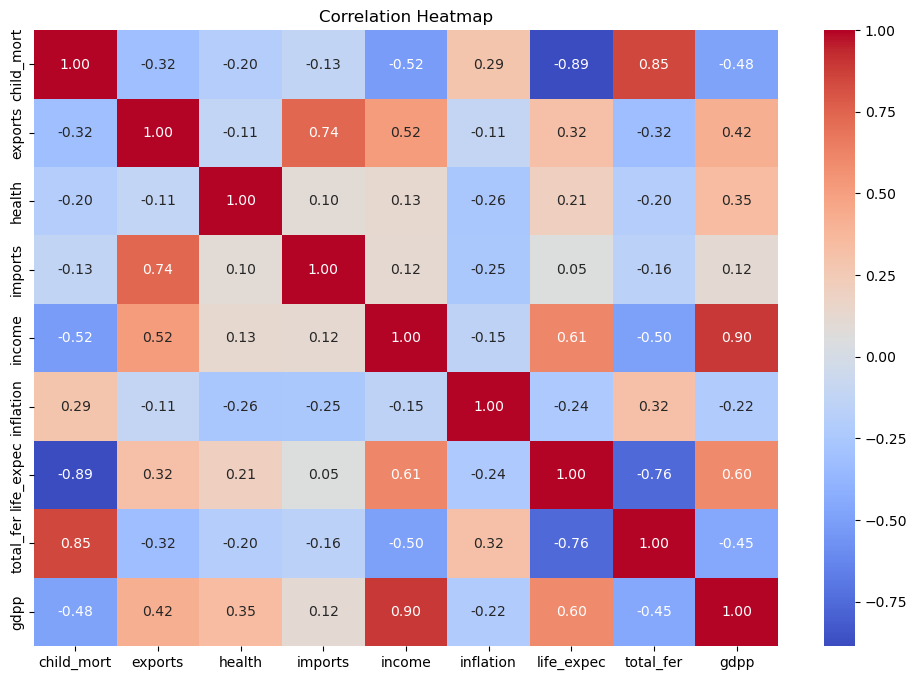

In [10]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

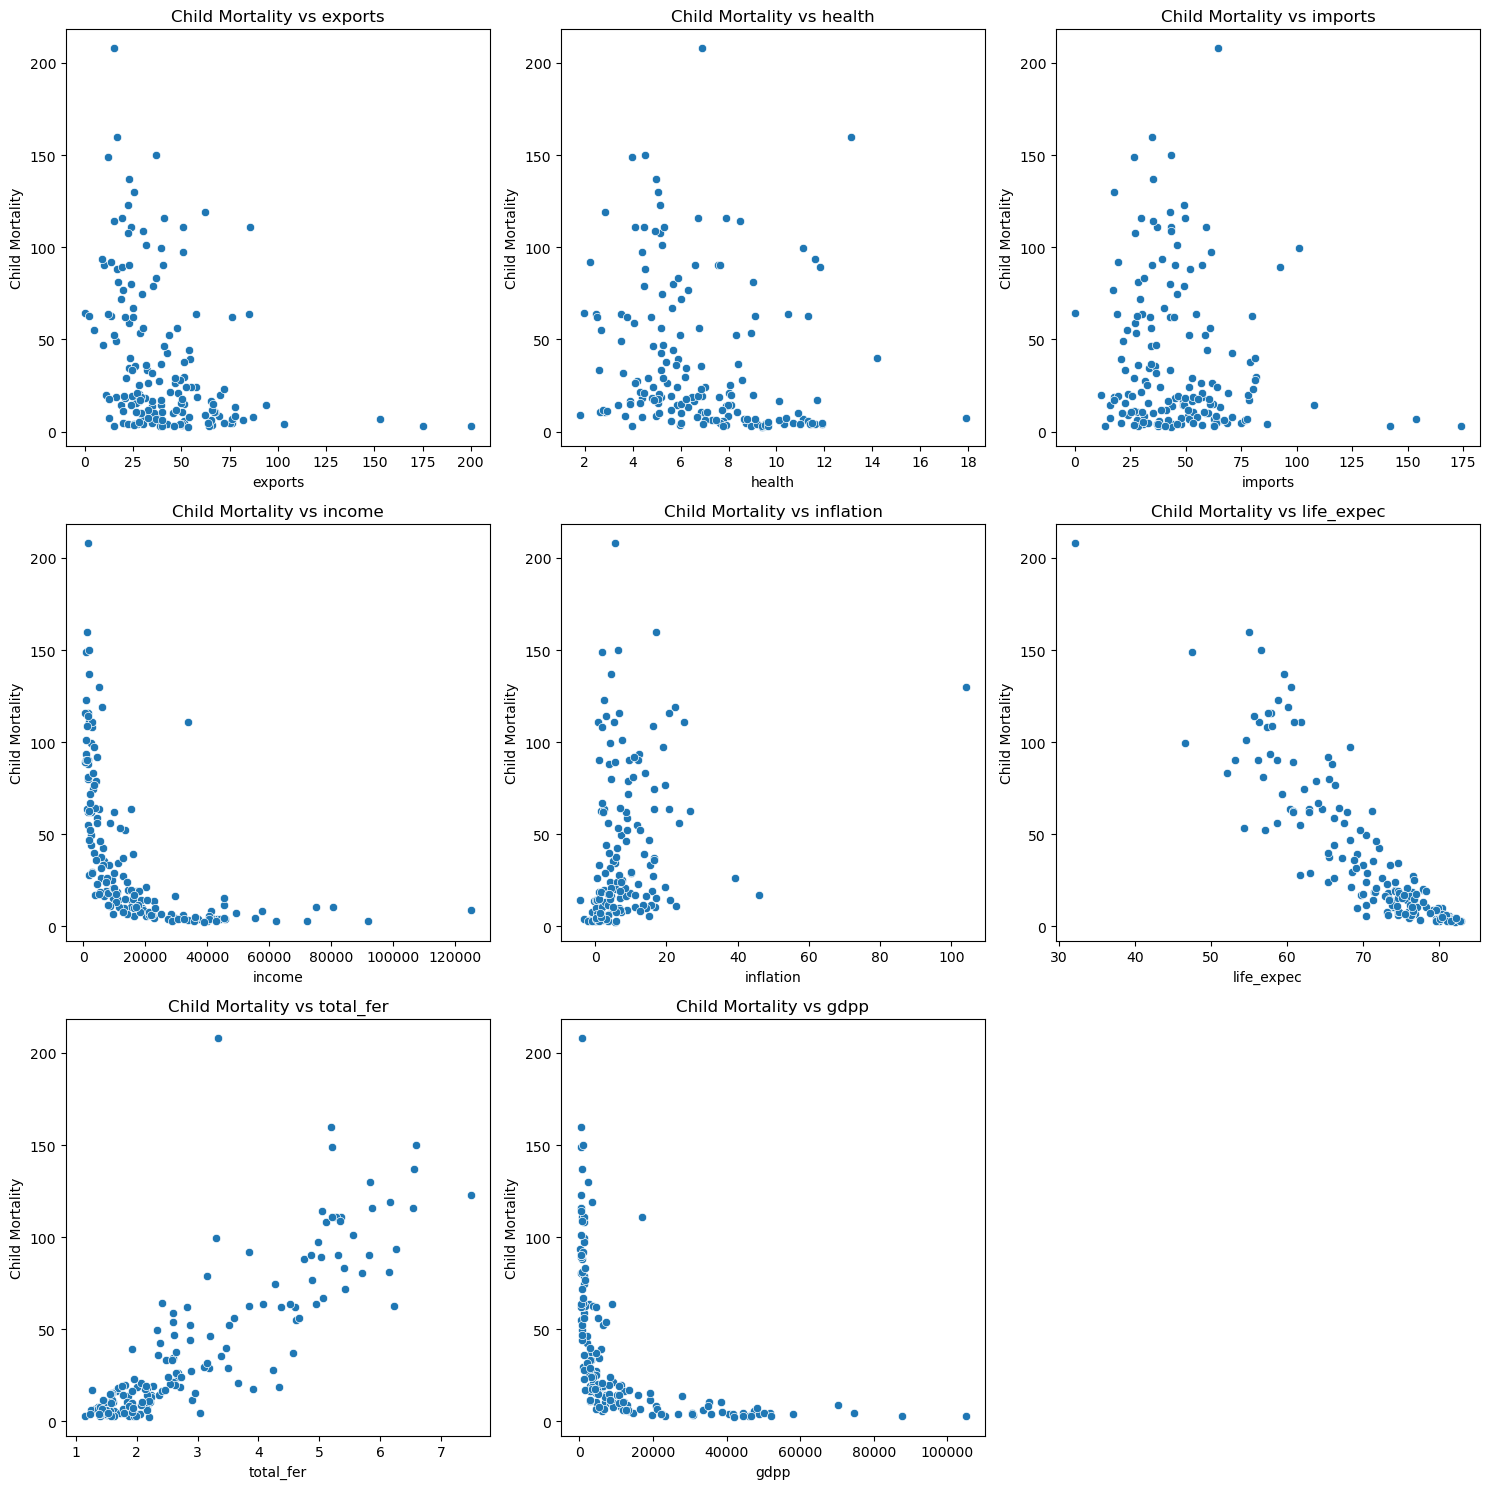

In [11]:
# Explore the continuous independent features against child_mort using scatter plots.

features = data_numeric.columns.drop(['child_mort'])

plt.figure(figsize=(15, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data_numeric[feature], y=data_numeric['child_mort'])
    plt.title(f'Child Mortality vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Child Mortality')

plt.tight_layout()
plt.show()

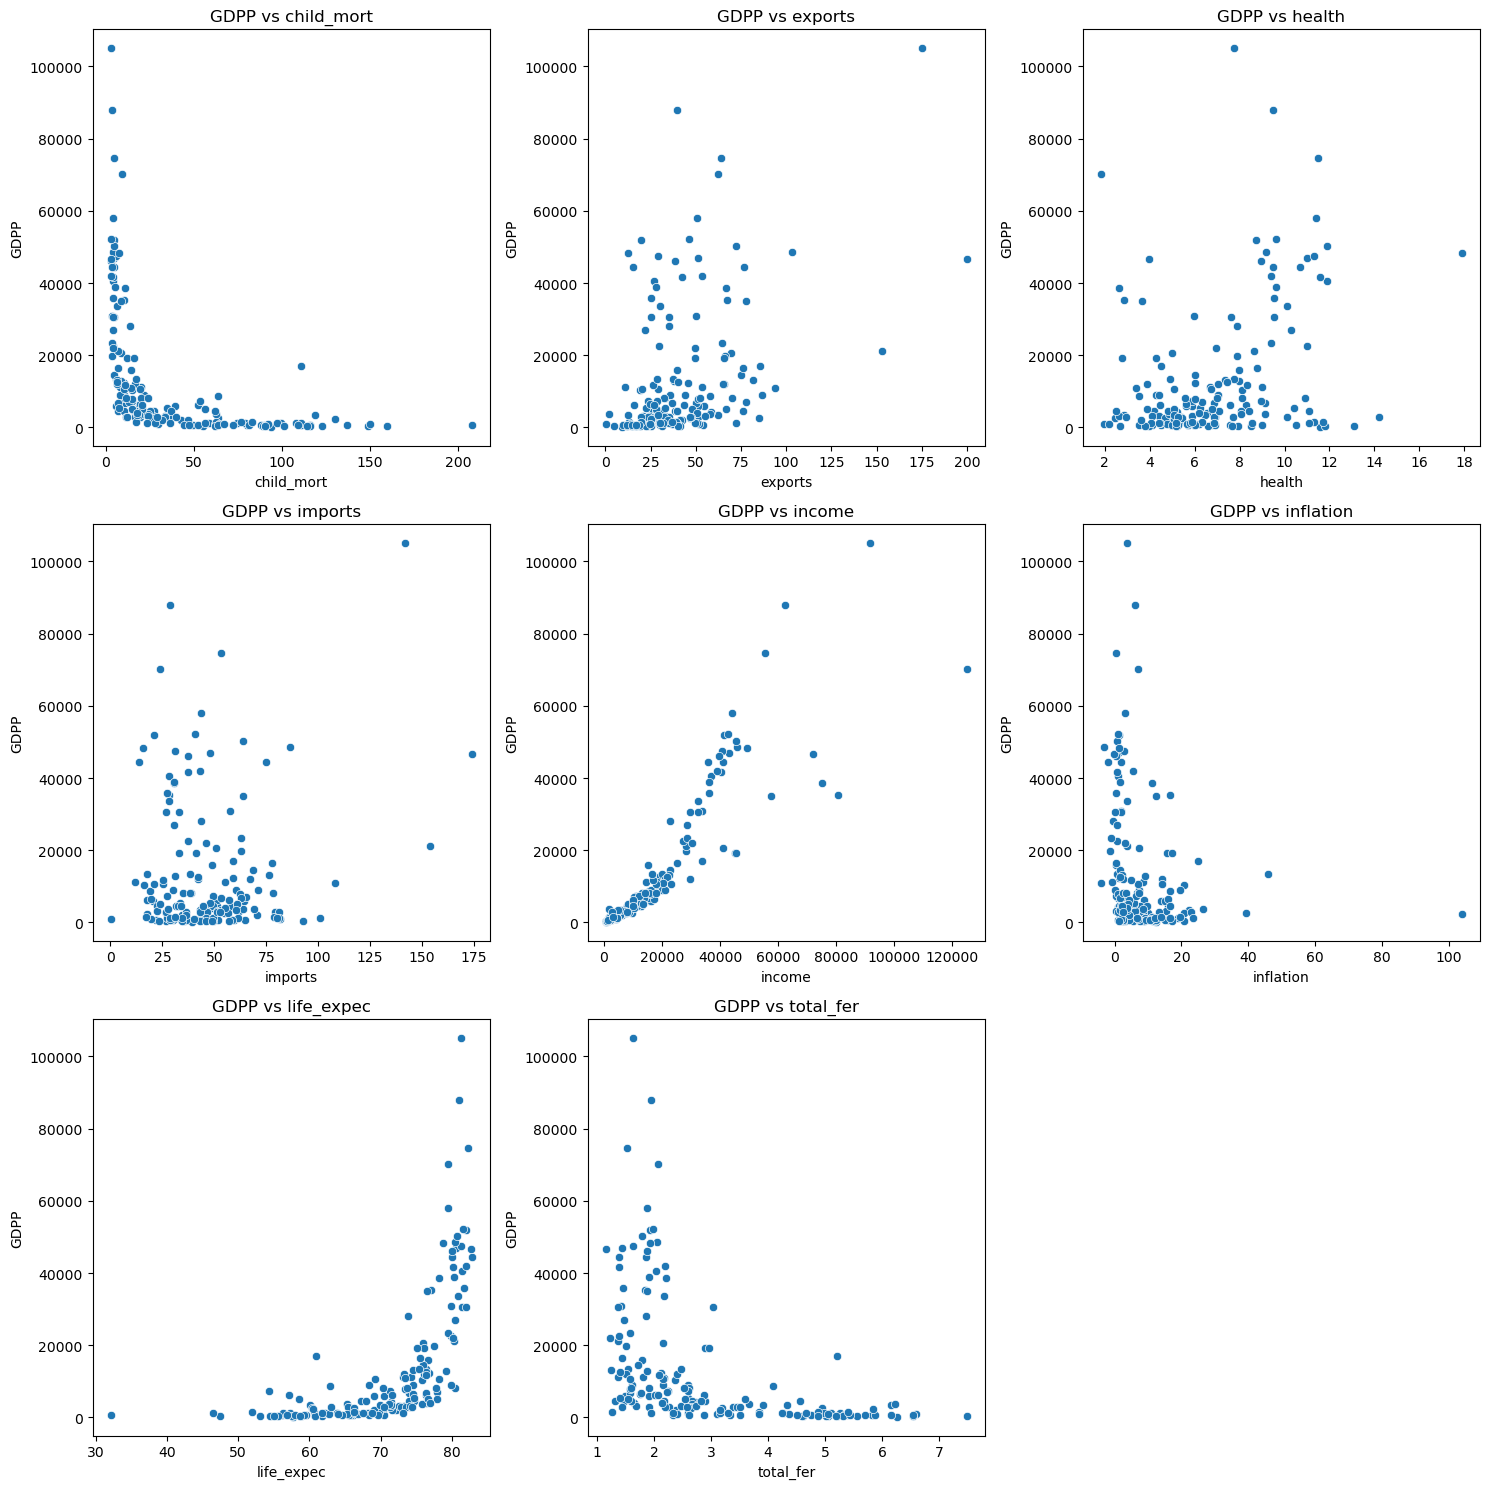

In [12]:
# Explore the continuous independent features against gdpp using scatter plots.

features = data_numeric.columns.drop(['gdpp'])

plt.figure(figsize=(15, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data_numeric[feature], y=data_numeric['gdpp'])
    plt.title(f'GDPP vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('GDPP')

plt.tight_layout()
plt.show()

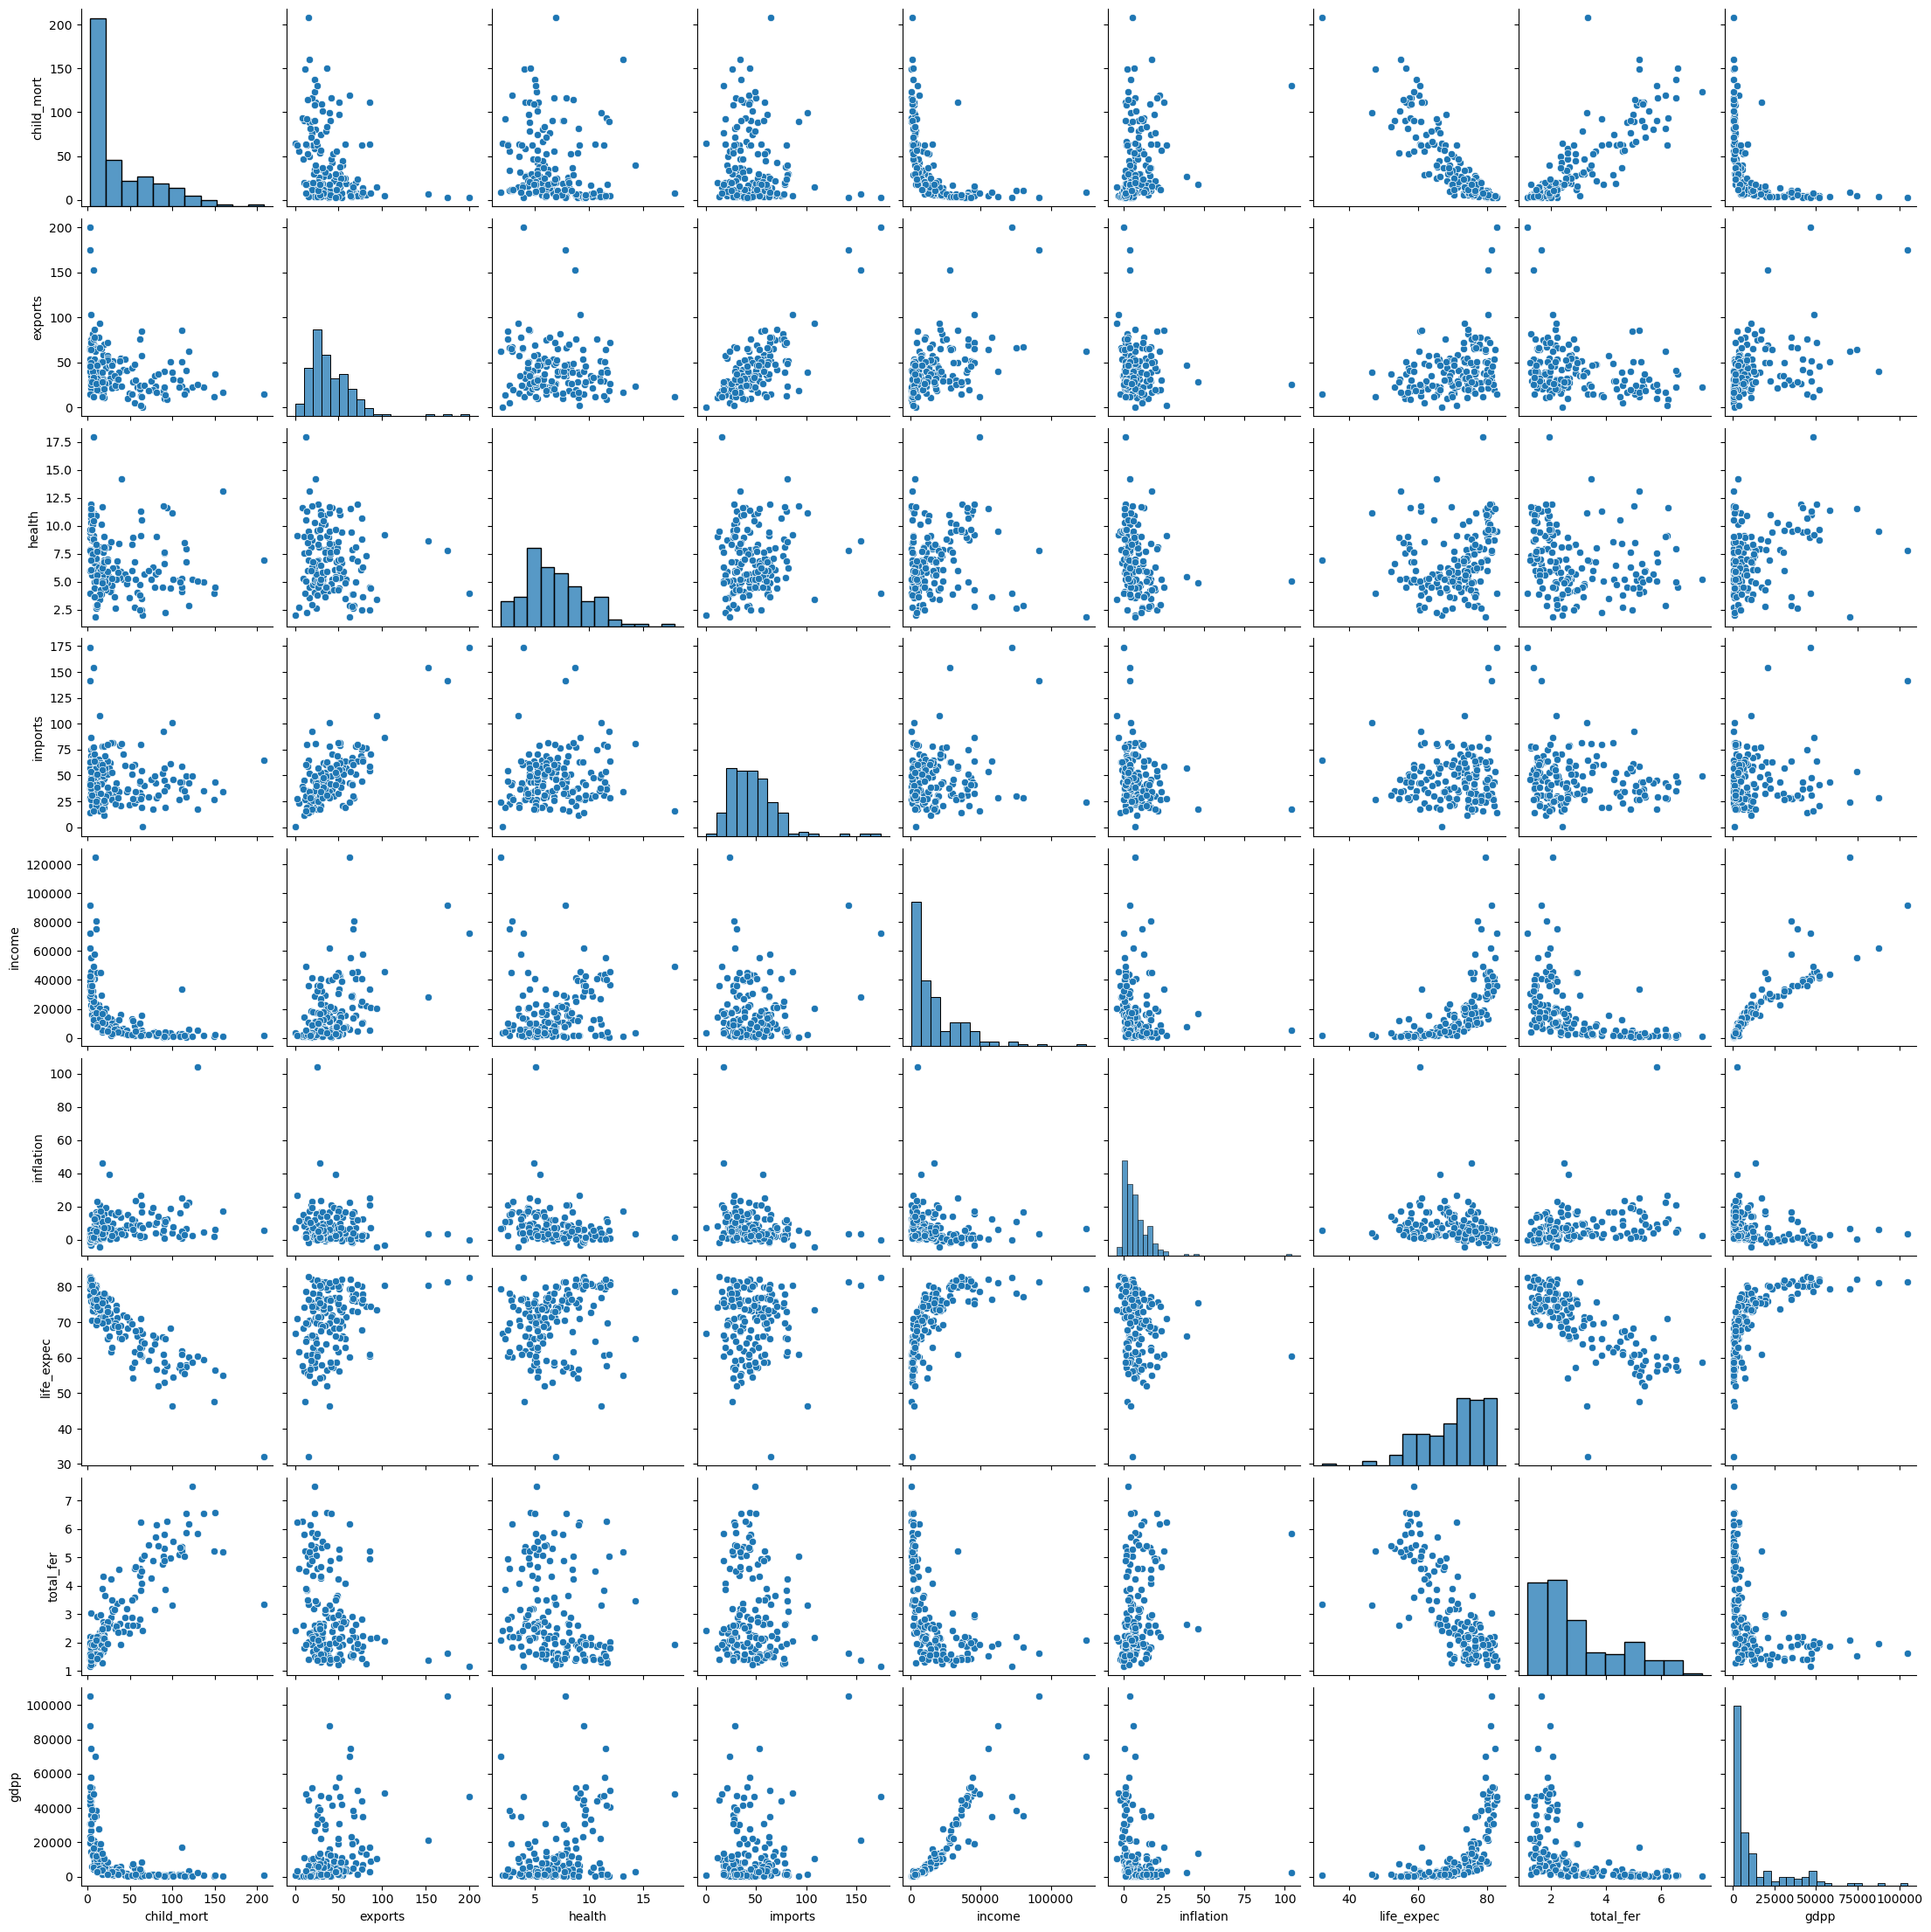

In [13]:
# Create a pair plot
# Hint: Explore seaborn pairplot

sns.pairplot(data_numeric)
plt.show()

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [14]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"


# df_scaled.head()

from sklearn.preprocessing import MinMaxScaler

# Normalise the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

# Display the first few rows of the normalized dataframe
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

In [15]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset

c:\Users\livhuwanim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\livhuwanim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\livhuwanim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\livhuwanim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_

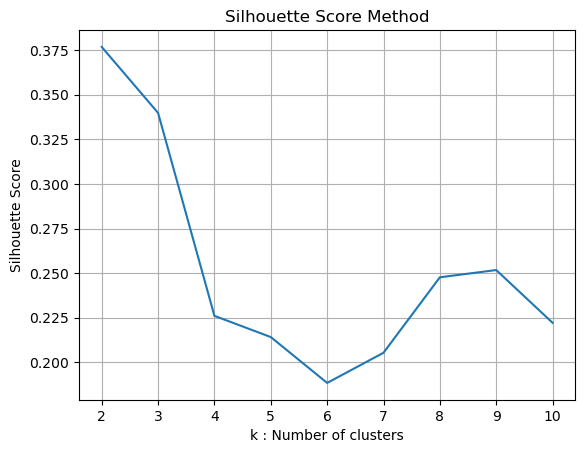

In [16]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

In [17]:
# Remember to set the random_state to rseed

from sklearn.cluster import KMeans

# Set the number of clusters
n_clusters = 4

# Initialize the KMeans model with the selected number of clusters and random_state for reproducibility
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the scaled data
kmeans.fit(df_scaled)

# Add the cluster labels to the scaled data
df_scaled['cluster'] = kmeans.labels_

c:\Users\livhuwanim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
# Count the number of records in each cluster

cluster_counts = df_scaled['cluster'].value_counts()
print(cluster_counts)

cluster
1    60
0    45
2    36
3    26
Name: count, dtype: int64


In [19]:
# Check model performance with the silhouette coefficient

from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the model
silhouette_avg = silhouette_score(df_scaled.drop(columns=['cluster']), df_scaled['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.22606711055519638


## Predictions

In [20]:
# Add the predicted cluster label column to the original dataframe

data['cluster'] = kmeans.labels_
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


## Visualisation of clusters

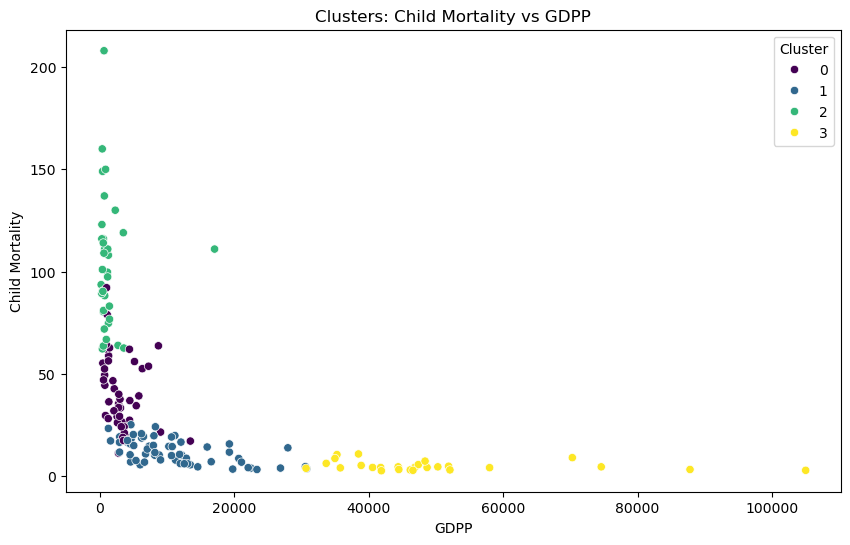

In [21]:
# Visualisation of clusters: child mortality vs gdpp

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of clusters: child mortality vs gdpp
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gdpp', y='child_mort', hue='cluster', palette='viridis')
plt.title('Clusters: Child Mortality vs GDPP')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.legend(title='Cluster')
plt.show()

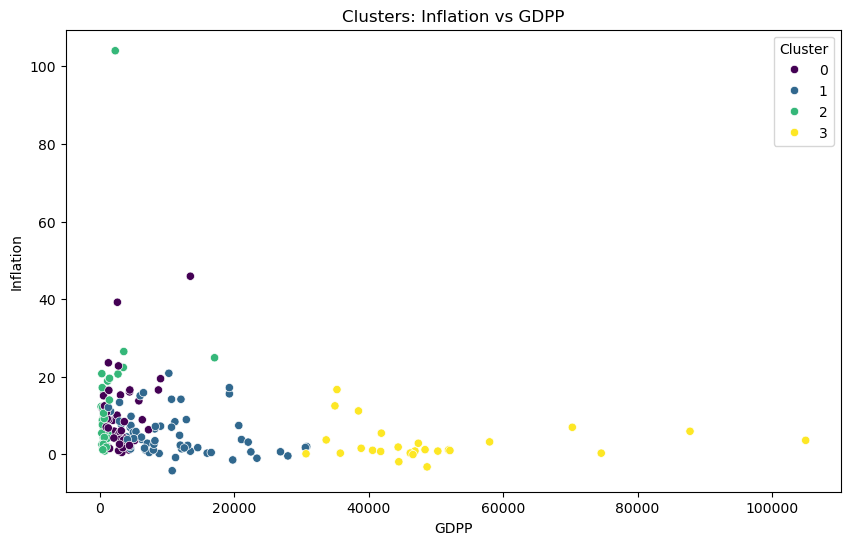

In [22]:
# Visualisation of clusters: inflation vs gdpp

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gdpp', y='inflation', hue='cluster', palette='viridis')
plt.title('Clusters: Inflation vs GDPP')
plt.xlabel('GDPP')
plt.ylabel('Inflation')
plt.legend(title='Cluster')
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

### Conclusions

Based on the clustering analysis, the countries have been grouped into four clusters. The clusters were analyzed using the mean values of child mortality, GDPP, and inflation to label each group. The labels assigned to each cluster and the justification for these labels are as follows:

1. **Cluster 0: Developed**
   - **Characteristics:**
     - **High GDPP:** Countries in this cluster have a high gross domestic product per capita, indicating a higher level of economic development.
     - **Low Child Mortality:** These countries have low child mortality rates, reflecting better healthcare and living conditions.
     - **Low Inflation:** The inflation rates in these countries are low, indicating stable economies.
   - **Examples:** Countries like those in Western Europe and North America.
   
2. **Cluster 1: Developing**
   - **Characteristics:**
     - **Moderate GDPP:** Countries in this cluster have a moderate level of GDPP, indicating a growing economy.
     - **Moderate Child Mortality:** These countries have moderate child mortality rates, suggesting improving healthcare and living conditions.
     - **Moderate Inflation:** The inflation rates are moderate, indicating economies that are still stabilizing.
   - **Examples:** Countries in parts of Asia and South America.
   
3. **Cluster 2: Least Developed**
   - **Characteristics:**
     - **Low GDPP:** Countries in this cluster have low GDPP, indicating low economic development.
     - **High Child Mortality:** These countries have high child mortality rates, reflecting poor healthcare and living conditions.
     - **High Inflation:** The inflation rates are high, indicating economic instability.
   - **Examples:** Countries in parts of Sub-Saharan Africa.
   
4. **Cluster 3: Underdeveloped**
   - **Characteristics:**
     - **Very Low GDPP:** Countries in this cluster have very low GDPP, indicating very low levels of economic development.
     - **Very High Child Mortality:** These countries have very high child mortality rates, reflecting severe challenges in healthcare and living conditions.
     - **Very High Inflation:** The inflation rates are very high, indicating significant economic instability.
   - **Examples:** Countries in the most impoverished regions globally.

### Justification

- **Economic Development (GDPP):** The GDPP is a primary indicator of the economic status of a country. Higher GDPP values are associated with developed economies that offer better living standards and economic opportunities.
- **Healthcare and Living Conditions (Child Mortality):** The child mortality rate is a crucial indicator of the healthcare quality and living conditions in a country. Lower child mortality rates indicate better healthcare systems and living environments.
- **Economic Stability (Inflation):** Inflation rates reflect the stability of an economy. Lower inflation rates are typical of stable economies with sound monetary policies, while high inflation rates are indicative of economic instability.

These labels and justifications provide a clear understanding of the development status of countries in each cluster, offering insights into their economic, healthcare, and stability conditions.